# <center>Самостійна робота №8
## <center>Виконав: студент групи ПБ-21 мп Якобчук Євгеній
## <center>Варіант №5
## <center>Загальні завдання для всіх варіантів

### 1. Завантажте навчальний набір даних. Проведіть оглядовий аналіз даних – визначте, чи є пропущені значення, скільки зразків у наборі даних, скільки класів, які імена класів, наскільки збалансовані класи.

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, GRU
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import utils
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 

In [2]:
df = pd.read_csv("E:/Магістр 1 курс 1 семестр/Інтелектуальні та інформаційні системи ІТ/Практикуми і самостійні/Пр8/disaster_tweets.csv - disaster_tweets.csv.csv", sep=",")
df.head()

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


In [3]:
df.isnull().sum()

id             0
keyword        0
location    3418
text           0
target         0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11370 non-null  int64 
 1   keyword   11370 non-null  object
 2   location  7952 non-null   object
 3   text      11370 non-null  object
 4   target    11370 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 444.3+ KB


In [5]:
df['target'].value_counts()

0    9256
1    2114
Name: target, dtype: int64

In [6]:
df['target'].value_counts(normalize=True).sort_values(ascending=False)

0    0.814072
1    0.185928
Name: target, dtype: float64

### 2. Здійсніть необхідні попередні перетворення над даними – створіть набори предикторів та цілей, переведіть їх до формату масивів numpy.

In [6]:
# Максимальна кількість слів 
num_words = 10000
# Максимальна довжина твітів
max_tweets_len = 30
# Кількість класів твітів
nb_classes = 2
# Зерно датчика випадкових чисел для відтворюваності результатів
np.random.seed(123)

In [7]:
tweets = df['text']
tweets.head()

0    Communal violence in Bhainsa, Telangana. "Ston...
1    Telangana: Section 144 has been imposed in Bha...
2    Arsonist sets cars ablaze at dealership https:...
3    Arsonist sets cars ablaze at dealership https:...
4    "Lord Jesus, your love brings freedom and pard...
Name: text, dtype: object

In [8]:
classes = df['target']
classes.head()

0    1
1    1
2    1
3    1
4    0
Name: target, dtype: int64

In [9]:
classes = pd.get_dummies(classes, prefix='Class')
classes.head()

,Class_0,Class_1
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


In [10]:
tweets = tweets.values
classes = classes.values

### 3. Сформуйте навчальну і тестову множини.

In [11]:
tweets_train, tweets_test, y_train, y_test = train_test_split(tweets, classes, test_size=0.1)

### 4. Використовуючи токенізатор в Keras, перетворіть текст у формат частотного числового подання.

In [12]:
tokenizer = Tokenizer(num_words=num_words)

In [13]:
tokenizer.fit_on_texts(tweets_train)

In [14]:
tokenizer.word_index

{'the': 1,
 'https': 2,
 't': 3,
 'co': 4,
 'to': 5,
 'a': 6,
 'of': 7,
 'in': 8,
 'and': 9,
 'is': 10,
 'i': 11,
 'for': 12,
 'on': 13,
 'you': 14,
 'that': 15,
 'this': 16,
 'it': 17,
 'with': 18,
 'are': 19,
 'was': 20,
 'at': 21,
 'my': 22,
 'have': 23,
 'from': 24,
 'be': 25,
 'by': 26,
 'we': 27,
 'not': 28,
 'as': 29,
 'but': 30,
 'has': 31,
 'an': 32,
 'they': 33,
 'amp': 34,
 'all': 35,
 'so': 36,
 'just': 37,
 'if': 38,
 'will': 39,
 '…': 40,
 'me': 41,
 'like': 42,
 'people': 43,
 'who': 44,
 'when': 45,
 'he': 46,
 'about': 47,
 'your': 48,
 'out': 49,
 'up': 50,
 'can': 51,
 'been': 52,
 'after': 53,
 'one': 54,
 'no': 55,
 'his': 56,
 'what': 57,
 'or': 58,
 'our': 59,
 'how': 60,
 'now': 61,
 'do': 62,
 'more': 63,
 'their': 64,
 'us': 65,
 'there': 66,
 'get': 67,
 'fire': 68,
 'were': 69,
 'had': 70,
 '1': 71,
 'new': 72,
 'over': 73,
 'would': 74,
 '2': 75,
 'time': 76,
 'some': 77,
 'she': 78,
 'her': 79,
 'because': 80,
 "it's": 81,
 'into': 82,
 'being': 83,
 'know

Перетворимо твіти до числового подання

In [15]:
sequences = tokenizer.texts_to_sequences(tweets_train)

In [16]:
index = 3
print(tweets_train[index])
print(sequences[index])

Fat Fox Fanclub x Gorge (disc 2) | Terminal Explosion https://t.co/WDXJyr42zn
[2006, 2196, 976, 4926, 75, 716, 2, 3, 4]


In [17]:
tokenizer.word_index['my']

22

### 5. Зрівняйте довжини навчальних векторів для нейронної мережі.

In [18]:
x_train = pad_sequences(sequences, maxlen=max_tweets_len)

In [19]:
x_train[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0, 4009,   62, 4009,    7,  463,
           9, 4922, 1113,   13, 1632, 1871, 4923, 1632],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,  117,  541,   42,  161,  142,
          16,   10, 6492, 4924,   27,   23,   75,  903],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  171,
        1751,   10, 2652,    5,  332,  300,  231,  354,    8, 6493,   26,
        4925,   18,   71,    8,  764,  109,  354, 1533],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 2006,
        2196,  976, 4926,   75,  716,    2,    3,    4],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,  245,   61,   51,    1, 4927, 1167,
         693,   13,  305, 2378, 

### 6. Створіть та навчіть рекурентну нейронну мережу вказаного у завданні типу для класифікації текстів або визначення їх емоційного забарвлення (в залежності від варіанту). Побудуйте та проаналізуйте графік навчання.

In [34]:
model_lstm = Sequential()

model_lstm.add(Embedding(num_words, 32, input_length=max_tweets_len))
model_lstm.add(LSTM(16))
model_lstm.add(Dense(2, activation='sigmoid'))

In [35]:
model_lstm.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])
model_lstm.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 30, 32)            320000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 34        
Total params: 323,170
Trainable params: 323,170
Non-trainable params: 0
_________________________________________________________________


In [36]:
model_lstm_save_path = 'best_model_lstm.h5'
checkpoint_callback_lstm = ModelCheckpoint(model_lstm_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [37]:
history_lstm = model_lstm.fit(x_train, 
                              y_train, 
                              epochs=10,
                              batch_size=64,
                              validation_split=0.1,
                              callbacks=[checkpoint_callback_lstm])

Epoch 1/10
144/144 [==============================] - ETA: 0s - loss: 0.4631 - accuracy: 0.8202
Epoch 00001: val_accuracy improved from -inf to 0.87207, saving model to best_model_lstm.h5
144/144 [==============================] - 2s 13ms/step - loss: 0.4631 - accuracy: 0.8202 - val_loss: 0.3193 - val_accuracy: 0.8721
Epoch 2/10
139/144 [===========================>..] - ETA: 0s - loss: 0.2616 - accuracy: 0.9125
Epoch 00002: val_accuracy improved from 0.87207 to 0.89160, saving model to best_model_lstm.h5
144/144 [==============================] - 1s 9ms/step - loss: 0.2598 - accuracy: 0.9130 - val_loss: 0.2810 - val_accuracy: 0.8916
Epoch 3/10
144/144 [==============================] - ETA: 0s - loss: 0.1597 - accuracy: 0.9525
Epoch 00003: val_accuracy improved from 0.89160 to 0.89551, saving model to best_model_lstm.h5
144/144 [==============================] - 1s 9ms/step - loss: 0.1597 - accuracy: 0.9525 - val_loss: 0.3112 - val_accuracy: 0.8955
Epoch 4/10
144/144 [================

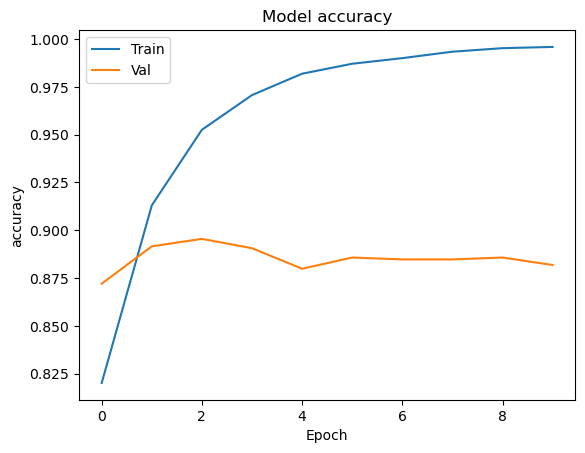

In [38]:
plt.plot(history_lstm.history['accuracy'])
plt.plot(history_lstm.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Отже, можемо побачити з графіку, що перенавчання виникає пілся 5 епохи. Колбек спрацював коректно.

### 7. Проведіть оцінку якості роботи навченої нейронної мережі на тестових даних.

In [39]:
test_sequences = tokenizer.texts_to_sequences(tweets_test)

In [40]:
x_test = pad_sequences(test_sequences, maxlen=max_tweets_len)

In [41]:
x_test[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0, 7334,   67,  752,   26,    2,    3,    4],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,   36,  371,   88,  361,   79,  505,  284, 1881,   65,
          58, 4649,  948, 2424,   99,   34,  111,   55],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,  369,  583],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0, 1263,    9,
          25, 3621,  142,    1, 1319,    2,    3,    4],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    1,  405, 

In [42]:
model_lstm.load_weights(model_lstm_save_path)

In [43]:
model_lstm.evaluate(x_test, y_test, verbose=1)

36/36 [==============================] - 0s 2ms/step - loss: 0.3132 - accuracy: 0.8927


[0.3131621181964874, 0.8927000761032104]

### 8. Застосуйте навчену нейронну мережу для аналізу будь-якого власного тексту.

In [86]:
my_tweet = ["I am desperately short of time to complete this task"]

In [87]:
my_sequence = tokenizer.texts_to_sequences(my_tweet)

In [88]:
my_sequence

[[11, 158, 7045, 1112, 7, 76, 5, 1436, 16, 5000]]

In [89]:
x_my = pad_sequences(my_sequence, maxlen=max_tweets_len)

In [90]:
class_names = [0, 1]

In [91]:
prediction_lstm = model_lstm.predict(x_my)
score_lstm = np.max(prediction_lstm)
prediction_lstm = np.argmax(prediction_lstm)

In [92]:
print(f'Категорія новини: {class_names[prediction_lstm]} \nДостовірність {score_lstm*100:.2f} %')

Категорія новини: 0 
Достовірність 98.77 %
